In [127]:
import pandas as pd
import numpy as np
import seaborn as sns

In [128]:
data = pd.read_csv("/home/afla/Documents/datasets/adult.data",
    names = ['age','workclass','fnlwgt','education','education-num',
             'marital-status','occupation','relationship','race','sex',
             'capital-gain','capital-loss','hours-per-week','native-country','Listing_of_attributes'])
data = data.head(1000)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Listing_of_attributes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Private,112840,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K
996,45,Private,89325,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,45,United-States,<=50K
997,48,Federal-gov,33109,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,0,58,United-States,>50K
998,40,Private,82465,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,2580,0,40,United-States,<=50K


In [129]:
data.dropna()
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [130]:
maps = {' <=50K':0 , ' >50K':1 }
data = data.replace({'Listing_of_attributes':maps})

data['education'] = np.where(data['education'] == ' 11th', 'School' ,data['education'])
data['education'] = np.where(data['education'] == ' 9th', 'School' ,data['education'])
data['education'] = np.where(data['education'] == ' 7th-8th', 'School' ,data['education'])
data['education'] = np.where(data['education'] == ' 5th-6th', 'School' ,data['education'])
data['education'] = np.where(data['education'] == ' Prof-school', 'School' ,data['education'])
data['education'] = np.where(data['education'] == ' 10th', 'School' ,data['education'])
data['education'] = np.where(data['education'] == ' 1st-4th', 'School' ,data['education'])
data['education'] = np.where(data['education'] == ' 12th', 'School' ,data['education'])
data['education'] = np.where(data['education'] == ' Preschool', 'School' ,data['education'])

data['education'] = np.where(data['education'] == ' Bachelors', 'Uni' ,data['education'])
data['education'] = np.where(data['education'] == ' HS-grad', 'Uni' ,data['education'])
data['education'] = np.where(data['education'] == ' Masters', 'Uni' ,data['education'])
data['education'] = np.where(data['education'] == ' Some-college', 'Uni' ,data['education'])
data['education'] = np.where(data['education'] == ' Assoc-acdm', 'Uni' ,data['education'])
data['education'] = np.where(data['education'] == ' Assoc-voc', 'Uni' ,data['education'])
data['education'] = np.where(data['education'] == ' Assoc-acdm', 'Uni' ,data['education'])

data['marital-status'] = np.where(data['marital-status'] == ' Married-civ-spouse',  'Married',data['marital-status'])
data['marital-status'] = np.where(data['marital-status'] == ' Married-spouse-absent',  'Married',data['marital-status'])
data['marital-status'] = np.where(data['marital-status'] == ' Separated',  'Married',data['marital-status'])
data['marital-status'] = np.where(data['marital-status'] == ' Married-AF-spouse',  'Married',data['marital-status'])
data['marital-status'] = np.where(data['marital-status'] == ' Widowed',  'Married',data['marital-status'])

#data['marital-status'].unique()
#data = data.drop(['Listing_of_attributes'], axis=1)
#data['Listing_of_attributes1'] = Listing_of_attributes
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Listing_of_attributes
0,39,State-gov,77516,Uni,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Uni,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,Uni,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Uni,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [131]:
datas = data.loc[: ,['age','fnlwgt','education','education-num','marital-status','sex','capital-gain','capital-loss','hours-per-week','Listing_of_attributes']]
datas.head(3)

,age,fnlwgt,education,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,Listing_of_attributes
0,39,77516,Uni,13,Never-married,Male,2174,0,40,0
1,50,83311,Uni,13,Married,Male,0,0,13,0
2,38,215646,Uni,9,Divorced,Male,0,0,40,0


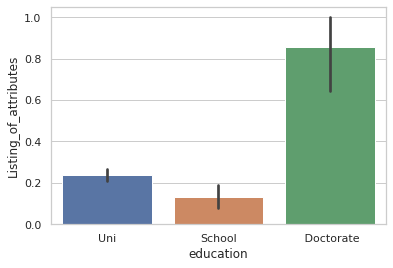

In [132]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="education", y="Listing_of_attributes", data = datas)

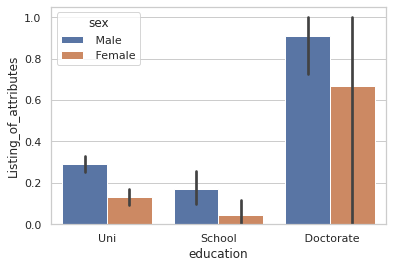

In [133]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="education", y="Listing_of_attributes",hue='sex', data = datas)

In [134]:
#datas.div()

<AxesSubplot:xlabel='age', ylabel='Count'>

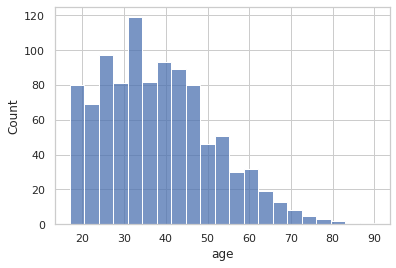

In [135]:
sns.histplot(data=datas, x="age")

In [136]:
datas.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Listing_of_attributes
count,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,38.05100,1.919050e+05,10.084000,588.526000,92.960000,39.876000,0.23200
std,13.34948,1.081255e+05,2.548615,2618.537515,412.442337,12.018114,0.42232
min,17.00000,2.117400e+04,1.000000,0.000000,0.000000,1.000000,0.00000
25%,28.00000,1.150412e+05,9.000000,0.000000,0.000000,40.000000,0.00000
50%,36.00000,1.805905e+05,10.000000,0.000000,0.000000,40.000000,0.00000
75%,46.00000,2.471522e+05,12.000000,0.000000,0.000000,45.000000,0.00000
max,90.00000,1.033222e+06,16.000000,34095.000000,2415.000000,99.000000,1.00000


In [137]:
dummy_data = pd.get_dummies(datas)
dummy_data.describe()
dummy_data.insert(14, 'Listing_of_attributes', dummy_data.pop("Listing_of_attributes"))
print(dummy_data.keys())

#dummy_data.insert(0, 'Listing_of_attributes', dummy_data['Listing_of_attributes'])
dummy_data

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education_ Doctorate', 'education_School',
       'education_Uni', 'marital-status_ Divorced',
       'marital-status_ Never-married', 'marital-status_Married',
       'sex_ Female', 'sex_ Male', 'Listing_of_attributes'],
      dtype='object')


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education_ Doctorate,education_School,education_Uni,marital-status_ Divorced,marital-status_ Never-married,marital-status_Married,sex_ Female,sex_ Male,Listing_of_attributes
0,39,77516,13,2174,0,40,0,0,1,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,1,0,0,1,0,1,0
2,38,215646,9,0,0,40,0,0,1,1,0,0,0,1,0
3,53,234721,7,0,0,40,0,1,0,0,0,1,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,112840,9,0,0,55,0,0,1,0,0,1,0,1,1
996,45,89325,14,0,0,45,0,0,1,1,0,0,0,1,0
997,48,33109,13,0,0,58,0,0,1,1,0,0,0,1,1
998,40,82465,10,2580,0,40,0,0,1,0,0,1,0,1,0


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


import statistics
from sklearn.model_selection import StratifiedKFold

list = [['REG' ,LinearRegression()],
        ['KNN',KNeighborsClassifier(n_neighbors=7)],
        ['CLF' ,LinearDiscriminantAnalysis()],
        ['CART',DecisionTreeClassifier()],
        ['BN'  ,GaussianNB()],
        ['Log reeg'  ,LogisticRegression()],
        ['SVM' ,SVC()]]

X = dummy_data[['age','fnlwgt', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'education_ Doctorate',
       'education_School', 'education_Uni', 'marital-status_ Divorced',
       'marital-status_ Never-married', 'marital-status_Married',
       'sex_ Female', 'sex_ Male']]
y = dummy_data['Listing_of_attributes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X.shape)
q = []
w = []
for h,j in list:
    skf = StratifiedKFold(n_splits=10 ,random_state = 42)
    A = cross_val_score(j, X_train, y_train, cv = skf)
    q.append(A)
    w.append(h)
    #print(h,':',A)
    print(h,':',np.mean(A)*100)

(1000, 14)
REG : 31.46411305306221
KNN : 76.14285714285714


/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CLF : 81.71428571428571
CART : 75.85714285714286
BN : 79.42857142857143


/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Log reeg : 79.71428571428572
SVM : 76.71428571428571


/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

#fig = plt.figure()
#fig.suptitle('Filme:)')
#ax = fig.add_subplot(111)
#m = plt.boxplot(q)
#ax.set_xticklabels(w)

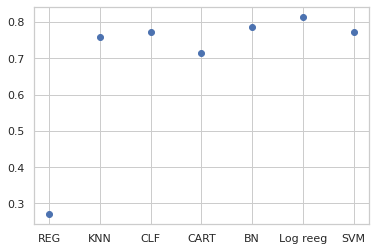

In [140]:
qq = np.array(q)
ww = np.array(w)
m = plt.scatter(ww,qq[:,0])
print(m)

In [141]:
print('s')
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

log = LogisticRegression()
selector = RFE(log,8)
selector = selector.fit(X, y)

print(selector.support_)



s


/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increa

[False False  True False False False  True False  True  True  True  True
  True  True]


/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
X_new = dummy_data[['education-num','education_ Doctorate','education_Uni', 'marital-status_ Divorced',
       'marital-status_ Never-married', 'marital-status_Married',
       'sex_ Female', 'sex_ Male']]

y = dummy_data['Listing_of_attributes']
X_new

NameError: name 'dummy_data' is not defined

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
q_new = []
w_new = []
for h,j in list:
    skf = StratifiedKFold(n_splits=10 ,random_state = 42)
    A = cross_val_score(j, X_train, y_train, cv = skf)
    q_new.append(A)
    w_new.append(h)
    #print(h,':',A)
    print(h,':',np.mean(A)*100)

/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


REG : 26.95835983515451
KNN : 79.42857142857143
CLF : 82.14285714285714
CART : 79.71428571428572


/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge 

BN : 75.71428571428571
Log reeg : 81.57142857142856
SVM : 78.85714285714286


/home/afla/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


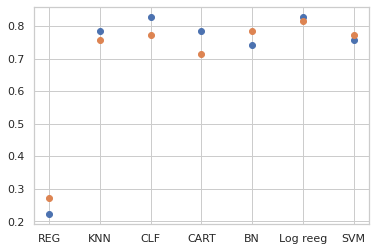

In [206]:
qq_new = np.array(q_new)
ww_new = np.array(w_new)
plt.scatter(ww_new,qq_new[:,0])
qq = np.array(q)
ww = np.array(w)
m = plt.scatter(ww,qq[:,0])
print(m)

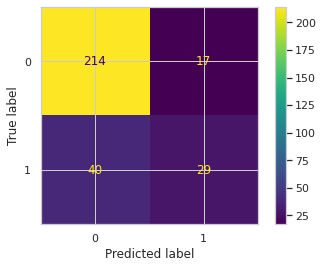

In [208]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log, X_test, y_test)  
plt.show()  

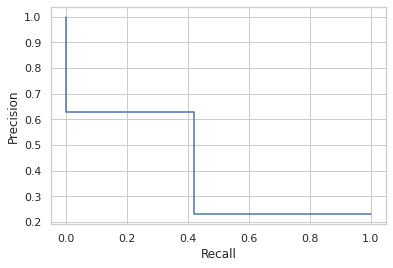

In [214]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_pred,
                                         pos_label= log.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [225]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[])
print(thresholds)

[2 1 0]


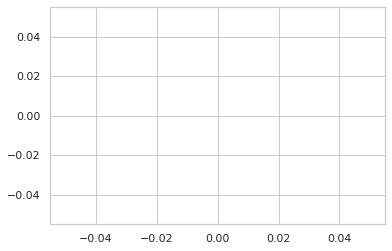

In [221]:
plt.scatter( tpr,thresholds)
plt.show()

In [233]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw = 2 , label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy',
         lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

NameError: name 'roc_auc' is not defined

<Figure size 432x288 with 0 Axes>